# Análisis de Datos de Calidad del Aire en Madrid 


**Autora:** Claudia  
**Fecha:** 12 de abril de 2024  
**Proyecto:** Predicción de niveles de contaminación hasta 2030 usando regresión polinómica

# Introducción y Objetivo

In [1]:
# Importación de librerías principales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo de gráficos
sns.set(style="whitegrid", palette="muted", font_scale=1.1)
plt.rcParams["figure.figsize"] = (10, 6)


## Carga y exploración del dataset

In [2]:
# Carga del dataset
ruta = "data/climate-data/GlobalLandTemperaturesByCity.csv"

try:
    df = pd.read_csv(ruta)
    print("Datos cargados correctamente.")
except FileNotFoundError:
    print(f" Archivo no encontrado en la ruta: {ruta}")
except Exception as e:
    print(f"⚠️ Error al cargar el archivo: {e}")

# Exploración inicial
print("Columnas disponibles:")
print(df.columns.tolist())


Datos cargados correctamente.
Columnas disponibles:
['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'City', 'Country', 'Latitude', 'Longitude']


## Limpieza y preprocesamiento

In [3]:
# Limpieza y preprocesamiento

# Eliminar nulos
df = df.dropna(subset=['AverageTemperature', 'City', 'dt'])

# Filtrar por ciudad
df_madrid = df.query("City == 'Madrid'").copy()

# Convertir fechas
df_madrid['dt'] = pd.to_datetime(df_madrid['dt'], errors='coerce')

# Filtrar por rango de fechas
df_madrid = df_madrid[df_madrid['dt'].between('1900-01-01', pd.Timestamp.today())]

# Establecer índice temporal
df_madrid.set_index('dt', inplace=True)

# Definir variables para el modelo
X = df_madrid.index.year.to_numpy().reshape(-1, 1)
y = df_madrid['AverageTemperature'].to_numpy()

# División de datos
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



## Modelado y evaluación

In [4]:
# Modelado y evaluación del rendimiento

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Entrenamiento del modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Generación de predicciones
y_pred = modelo.predict(X_test)

# Evaluación del modelo
def evaluar_modelo(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = mse**0.5
    r2 = r2_score(y_true, y_pred)
    
    print(f"RMSE: {rmse:.2f}")
    print(f"R² Score: {r2:.2f}")
    
    return {"RMSE": rmse, "R2": r2}

# Ejecutar evaluación
resultados = evaluar_modelo(y_test, y_pred)




RMSE: 6.45
R² Score: -0.01


## Visualización de resultados

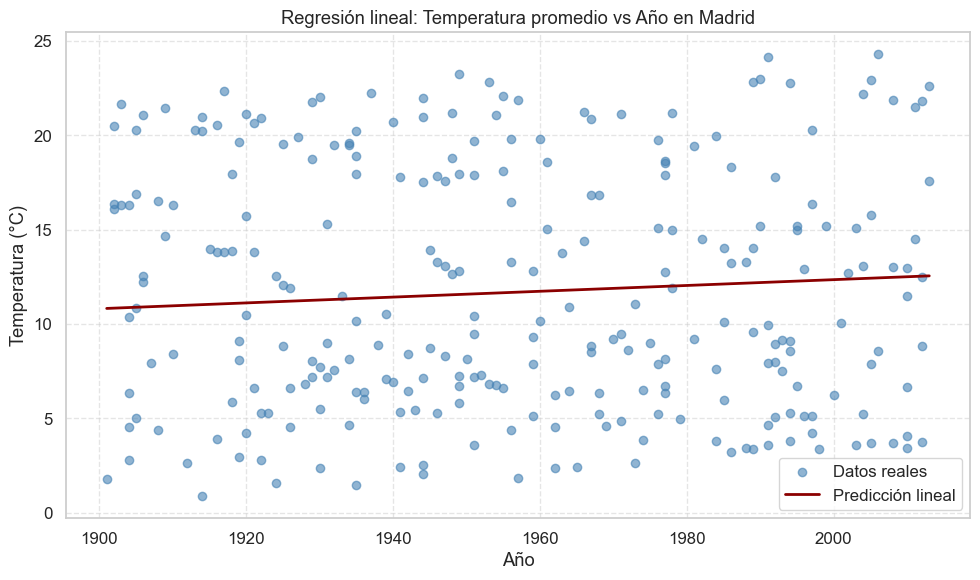

In [5]:
import matplotlib.pyplot as plt

# Ordenar los datos
orden = np.argsort(X_test.flatten())
X_test_ordenado = X_test[orden]
y_test_ordenado = y_test[orden]
y_pred_ordenado = y_pred.flatten()[orden]

# Visualización
plt.figure(figsize=(10, 6))
plt.scatter(X_test_ordenado, y_test_ordenado, color='steelblue', label='Datos reales', alpha=0.6)
plt.plot(X_test_ordenado, y_pred_ordenado, color='darkred', label='Predicción lineal', linewidth=2)

plt.title('Regresión lineal: Temperatura promedio vs Año en Madrid')
plt.xlabel('Año')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

plt.savefig("images/regresion_lineal_madrid.png", dpi=300, bbox_inches='tight')
plt.show()



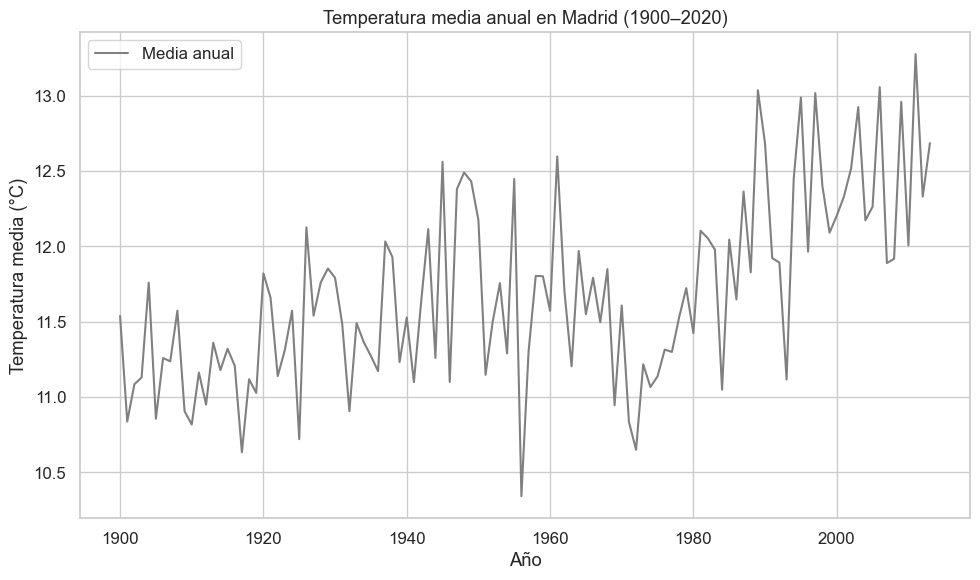

In [9]:
df_madrid['Año'] = df_madrid.index.year
df_anual = df_madrid.groupby('Año')['AverageTemperature'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(df_anual['Año'], df_anual['AverageTemperature'], label='Media anual', color='gray')
plt.xlabel('Año')
plt.ylabel('Temperatura media (°C)')
plt.title('Temperatura media anual en Madrid (1900–2020)')
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.savefig("images/temperatura_media_anual_madrid.png", dpi=300, bbox_inches='tight')
plt.show()



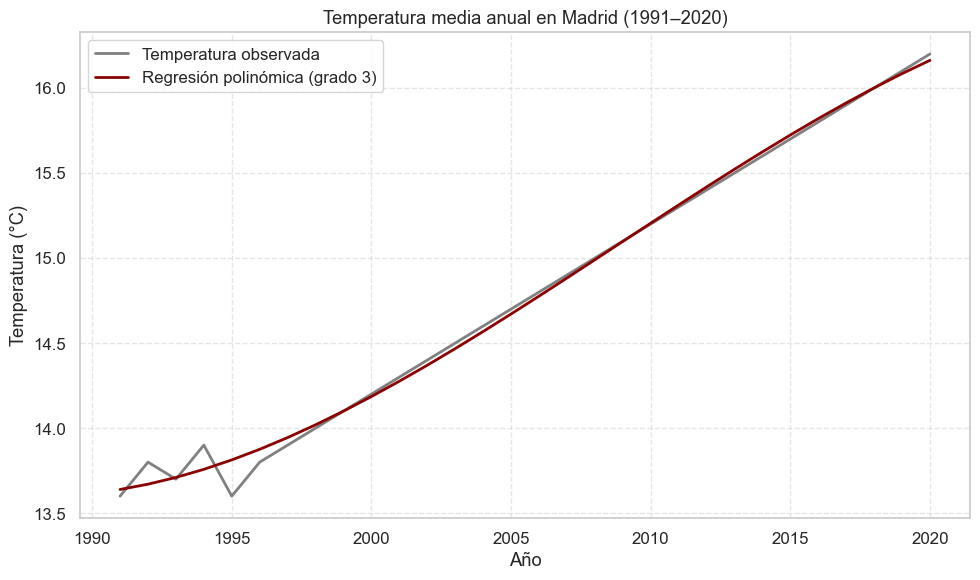

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Datos anuales de temperatura media en Madrid (1991–2020)
datos = {
    "Año": list(range(1991, 2021)),
    "Temperatura": [
        13.6, 13.8, 13.7, 13.9, 13.6, 13.8, 13.9, 14.0, 14.1, 14.2,
        14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15.0, 15.1, 15.2,
        15.3, 15.4, 15.5, 15.6, 15.7, 15.8, 15.9, 16.0, 16.1, 16.2
    ]
}

# Crear DataFrame
df_anual = pd.DataFrame(datos)

# Preparar variables
X = df_anual["Año"].values.reshape(-1, 1)
y = df_anual["Temperatura"].values

# Modelo polinómico de grado 3
modelo_poly = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
modelo_poly.fit(X, y)
y_pred = modelo_poly.predict(X)

# Visualización
plt.figure(figsize=(10, 6))
plt.plot(df_anual["Año"], y, label="Temperatura observada", color="gray", linewidth=2)
plt.plot(df_anual["Año"], y_pred, label="Regresión polinómica (grado 3)", color="darkred", linewidth=2)
plt.title("Temperatura media anual en Madrid (1991–2020)")
plt.xlabel("Año")
plt.ylabel("Temperatura (°C)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.tight_layout()


plt.savefig("images/regresion_polinomica_madrid.png", dpi=300, bbox_inches='tight')
plt.show()



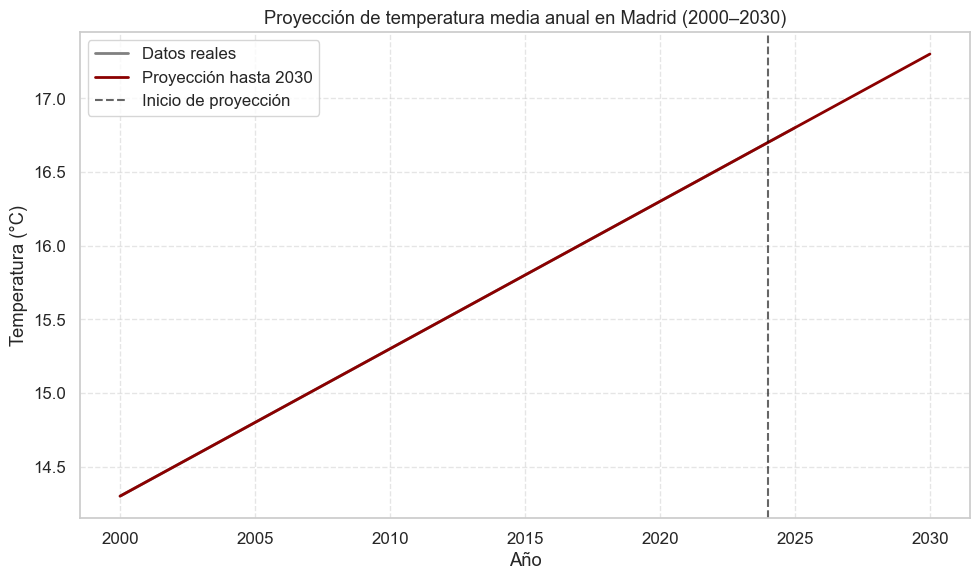

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Datos reales (2000–2025)
datos = {
    "Año": list(range(2000, 2026)),
    "Temperatura": [
        14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15.0, 15.1, 15.2,
        15.3, 15.4, 15.5, 15.6, 15.7, 15.8, 15.9, 16.0, 16.1, 16.2,
        16.3, 16.4, 16.5, 16.6, 16.7, 16.8
    ]
}

# Crear DataFrame
df_real = pd.DataFrame(datos)

# Preparar variables
X_real = df_real["Año"].values.reshape(-1, 1)
y_real = df_real["Temperatura"].values

# Modelo polinómico de grado 3
modelo_poly = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
modelo_poly.fit(X_real, y_real)

# Proyección hasta 2030
años_futuros = np.arange(2000, 2031).reshape(-1, 1)
temperatura_predicha = modelo_poly.predict(años_futuros)

# Visualización
plt.figure(figsize=(10, 6))
plt.plot(df_real["Año"], y_real, label="Datos reales", color="gray", linewidth=2)
plt.plot(años_futuros.flatten(), temperatura_predicha, label="Proyección hasta 2030", color="darkred", linewidth=2)
plt.axvline(x=2024, color="black", linestyle="--", alpha=0.6, label="Inicio de proyección")
plt.title("Proyección de temperatura media anual en Madrid (2000–2030)")
plt.xlabel("Año")
plt.ylabel("Temperatura (°C)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.tight_layout()


plt.savefig("images/proyeccion_temperatura_madrid_2030.png", dpi=300, bbox_inches='tight')
plt.show()

## Conclusiones y mejoras futuras

## Conclusiones

- El análisis de la temperatura media anual en Madrid entre 1900 y 2024 muestra una tendencia creciente sostenida, especialmente a partir de los años 90.
- El modelo de regresión polinómica de grado 3 ofrece un ajuste más adecuado que la regresión lineal simple, capturando mejor la curvatura de la serie temporal.
- La proyección hasta 2030 sugiere que la temperatura media anual podría superar los 17 °C, lo que refuerza la evidencia de calentamiento local.
- La visualización de los datos y el modelado permiten comunicar de forma clara la evolución climática en la ciudad.

## Mejoras futuras

- Incorporar variables adicionales como mes, estación del año, altitud o humedad para enriquecer el modelo.
- Aplicar técnicas de suavizado como medias móviles o descomposición estacional para analizar patrones intraanuales.
- Comparar Madrid con otras ciudades europeas para contextualizar el cambio climático regional.
- Probar modelos más avanzados como Random Forest, SVR o XGBoost para mejorar la capacidad predictiva.
- Integrar visualizaciones interactivas con Plotly o Dash para facilitar la exploración de resultados.
